In [15]:
import mysql.connector
from sqlalchemy import create_engine
import pandas as pd
import seaborn

# Define as informações de conexão
config = {
  'user': 'doispontos',
  'password': 'cavaLO402b',
  'host': 'brigos.com.br',
  'database': 'source_double',
  'port': 61690
}

# Cria a conexão com o banco de dados
conn = mysql.connector.connect(**config)

# Cria um objeto de conexão compatível com o método pd.read_sql()
engine = create_engine(f"mysql+mysqlconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}")

# Define a consulta SQL
query = 'SELECT * FROM source_double.api_gocontrolbetresult;'

In [18]:
df = pd.read_sql(query, engine)
df.head()
# Fecha a conexão
#conn.close()

,id,ID_bet,timestamp,timestamp_signal,color,source,win,status,gale,amount,balanceWin
0,1,qlPe6yb5rz,1.682491e+09,1.682491e+09,1,1755113665,0,simulado,0,2.0,-1.0
1,2,qlPe6yb5rz,1.682491e+09,1.682491e+09,1,1570776802,0,simulado,0,2.0,-1.0
2,3,V1eK5nRwlo,1.682491e+09,1.682491e+09,1,1755113665,1,simulado,1,4.0,2.0
3,4,V1eK5nRwlo,1.682491e+09,1.682491e+09,1,1570776802,1,simulado,1,4.0,2.0
4,5,z1xQVy7Wkp,1.682491e+09,1.682491e+09,1,1755113665,0,simulado,0,2.0,-1.0


In [19]:
len(df)

8366

In [11]:
#!pip install seaborn  

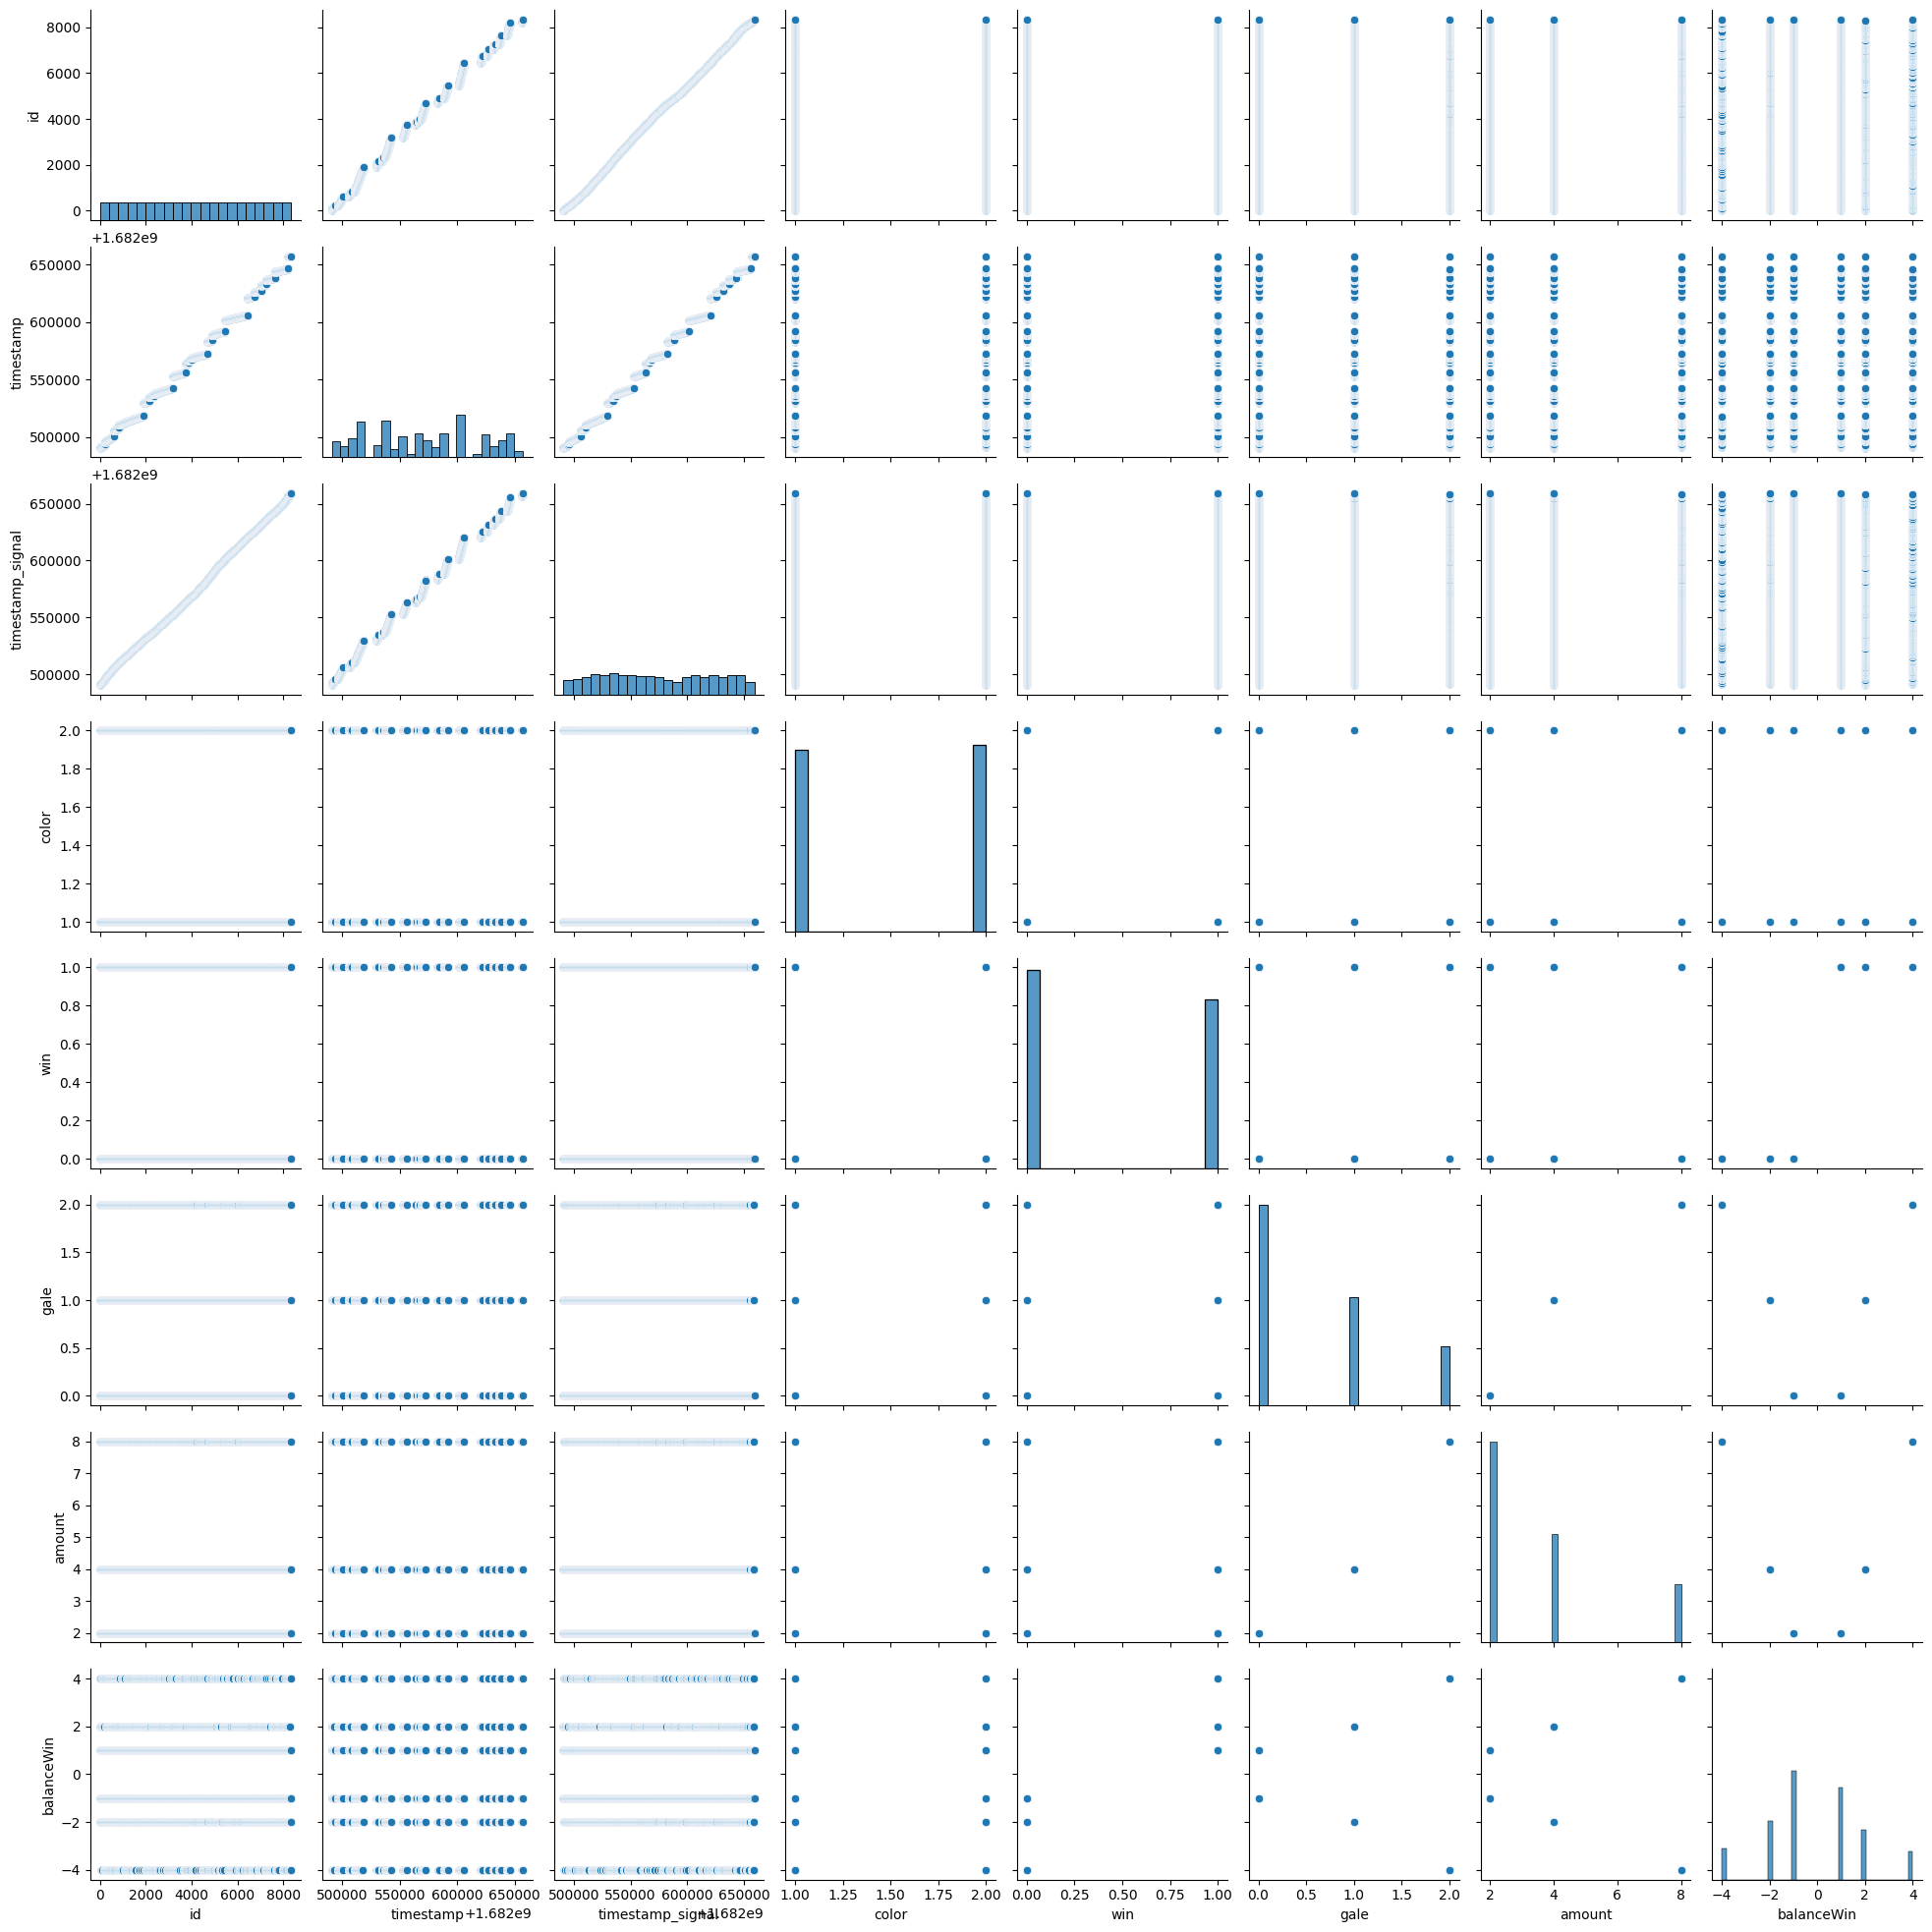

In [12]:
seaborn.pairplot(df)

In [21]:
df.to_csv("qualquercoisa.csv")